# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [19]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [20]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [21]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()  


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [22]:
# 2. Get the total drivers for each city type
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [23]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [24]:
#  4. Get the average fare per ride for each city type. 
sum_avg_fares_by_type = pyber_data_df.groupby(["type"]).mean()["fare"]
sum_avg_fares_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [25]:
# 5. Get the average fare per driver for each city type. 
avg_fares_by_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).sum()["driver_count"]
avg_fares_by_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [26]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Total Rides": total_ride_count,
         "Total Drivers": total_driver_count,
         "Total Fares": sum_fares_by_type,
         "Average Fare per Ride": sum_avg_fares_by_type,
         "Average Fare per Driver": avg_fares_by_driver})

#Display data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [43]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [111]:
#  8. Format the columns.


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [82]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# 1. Read the merged DataFrame
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [83]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares
#  for each date where the indices are the city type and date
type_date = pyber_data_df.groupby(["date","type"]).sum()["fare"].to_frame()


In [84]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date = type_date.reset_index()
type_date.tail(10)

,date,type,fare
2354,5/7/2019 5:55,Urban,6.89
2355,5/7/2019 7:08,Suburban,20.52
2356,5/7/2019 8:47,Urban,25.83
2357,5/8/2019 11:38,Urban,19.77
2358,5/8/2019 13:10,Urban,18.04
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45
2363,5/8/2019 7:29,Urban,18.55


In [87]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = type_date.pivot(index="date", columns="type", values="fare")
type_date_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
5/7/2019 5:55,NaN,NaN,6.89
5/7/2019 7:08,NaN,20.52,NaN
5/7/2019 8:47,NaN,NaN,25.83
5/8/2019 11:38,NaN,NaN,19.77
5/8/2019 13:10,NaN,NaN,18.04
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99
5/8/2019 4:39,NaN,NaN,18.45


In [89]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
type_date_filter = type_date_pivot.loc["2019-01-01": "2019-04-29"]
type_date_filter


type,Rural,Suburban,Urban
date,,,


In [90]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type_date_pivot.index = pd.to_datetime(type_date_pivot.index)
type_date_pivot.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-05-07 05:55:00', '2019-05-07 07:08:00',
               '2019-05-07 08:47:00', '2019-05-08 11:38:00',
               '2019-05-08 13:10:00', '2019-05-08 01:54:00',
               '2019-05-08 02:31:00', '2019-05-08 04:20:00',
               '2019-05-08 04:39:00', '2019-05-08 07:29:00'],
              dtype='datetime64[ns]', name='date', length=2361, freq=None)

In [91]:
# 7. Check that the datatype for the index is datetime using df.info()
type_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [92]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_date_week = type_date_pivot.resample("W").sum()
type_date_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


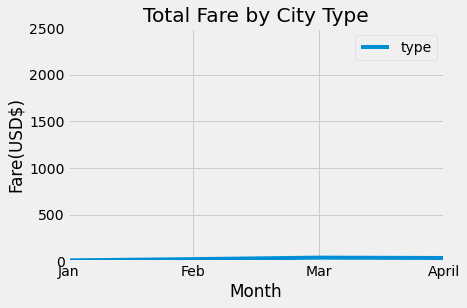

In [126]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Import dependencies.
import matplotlib.pyplot as plt
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Set the x-axis to a list of strings for each month.
x_axis = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# create the plot
plt.subplots
plt.plot(x_axis, y_axis, label='type')
labels=["Rural", "Suburban", "Urban"],
colors=["gold", "lightskyblue", "lightcoral"],
plt.xlabel("Month")
plt.ylabel("Fare(USD$)")
# Set the y limit between 0 and 2500.
plt.ylim(0, 2500)
plt.xlim(0, 3)
# create a title.
plt.title('Total Fare by City Type')
# Add the legend.
plt.legend()
# save the figure
plt.savefig("analysis/Fig1.png")
plt.show()
